# Synthetic Data Examples

In [ ]:
# Uncomment the following line when running on Google Colab
# !pip install "autora"

Load the Weber-Fechner Law:

In [ ]:
import numpy as np
from autora.experiment_runner.synthetic.psychophysics.weber_fechner_law import weber_fechner_law
s = weber_fechner_law()

Check the docstring to get information about the model

In [ ]:
help(weber_fechner_law)

Help on function weber_fechner_law in module autora.experiment_runner.synthetic.psychophysics.weber_fechner_law:

weber_fechner_law(name='Weber-Fechner Law', resolution=100, constant=1.0, maximum_stimulus_intensity=5.0)
    Weber-Fechner Law
    
    Args:
        name: name of the experiment
        resolution: number of allowed values for stimulus 1 and 2
        constant: constant multiplier
        maximum_stimulus_intensity: maximum value for stimulus 1 and 2
    
    Examples:
        >>> experiment = weber_fechner_law()
    
        # The runner can accept numpy arrays or pandas DataFrames, but the return value will
        # always be a pandas DataFrame.
        >>> experiment.run(np.array([[.1,.2]]), random_state=42)
            S1   S2  difference_detected
        0  0.1  0.2             0.696194
    
        >>> experiment.run(pd.DataFrame({'S1': [0.1], 'S2': [0.2]}), random_state=42)
            S1   S2  difference_detected
        0  0.1  0.2             0.696194



... or use the describe function:

In [ ]:
from autora.experiment_runner.synthetic.utilities import describe

print(describe(s))


    Weber-Fechner Law

    Args:
        name: name of the experiment
        resolution: number of allowed values for stimulus 1 and 2
        constant: constant multiplier
        maximum_stimulus_intensity: maximum value for stimulus 1 and 2

    Examples:
        >>> experiment = weber_fechner_law()

        # The runner can accept numpy arrays or pandas DataFrames, but the return value will
        # always be a pandas DataFrame.
        >>> experiment.run(np.array([[.1,.2]]), random_state=42)
            S1   S2  difference_detected
        0  0.1  0.2             0.696194

        >>> experiment.run(pd.DataFrame({'S1': [0.1], 'S2': [0.2]}), random_state=42)
            S1   S2  difference_detected
        0  0.1  0.2             0.696194

    


The synthetic experiement `s` has properties like the name of the experiment:

In [ ]:
s.name

'Weber-Fechner Law'

... a valid metadata description:

In [ ]:
s.variables

VariableCollection(independent_variables=[IV(name='S1', value_range=(0.01, 5.0), allowed_values=array([0.01      , 0.06040404, 0.11080808, 0.16121212, 0.21161616,
       0.2620202 , 0.31242424, 0.36282828, 0.41323232, 0.46363636,
       0.5140404 , 0.56444444, 0.61484848, 0.66525253, 0.71565657,
       0.76606061, 0.81646465, 0.86686869, 0.91727273, 0.96767677,
       1.01808081, 1.06848485, 1.11888889, 1.16929293, 1.21969697,
       1.27010101, 1.32050505, 1.37090909, 1.42131313, 1.47171717,
       1.52212121, 1.57252525, 1.62292929, 1.67333333, 1.72373737,
       1.77414141, 1.82454545, 1.87494949, 1.92535354, 1.97575758,
       2.02616162, 2.07656566, 2.1269697 , 2.17737374, 2.22777778,
       2.27818182, 2.32858586, 2.3789899 , 2.42939394, 2.47979798,
       2.53020202, 2.58060606, 2.6310101 , 2.68141414, 2.73181818,
       2.78222222, 2.83262626, 2.8830303 , 2.93343434, 2.98383838,
       3.03424242, 3.08464646, 3.13505051, 3.18545455, 3.23585859,
       3.28626263, 3.33666667, 3.

... a function to generate the full domain of the data (if possible)

In [ ]:
x = s.domain()
x

array([[0.01      , 0.01      ],
       [0.01      , 0.06040404],
       [0.01      , 0.11080808],
       ...,
       [4.94959596, 4.94959596],
       [4.94959596, 5.        ],
       [5.        , 5.        ]])

... the experiment_runner which can be called to generate experimental results:

In [ ]:
import numpy as np
y = s.run(x)  # doctest: +ELLIPSIS
y

,S1,S2,difference_detected
0,0.010000,0.010000,-0.013734
1,0.010000,0.060404,1.788438
2,0.010000,0.110808,2.403593
3,0.010000,0.161212,2.781474
4,0.010000,0.211616,3.055966
...,...,...,...
5045,4.899192,4.949596,0.025322
5046,4.899192,5.000000,0.022726
5047,4.949596,4.949596,0.000098
5048,4.949596,5.000000,0.002932


... a function to plot the ground truth:

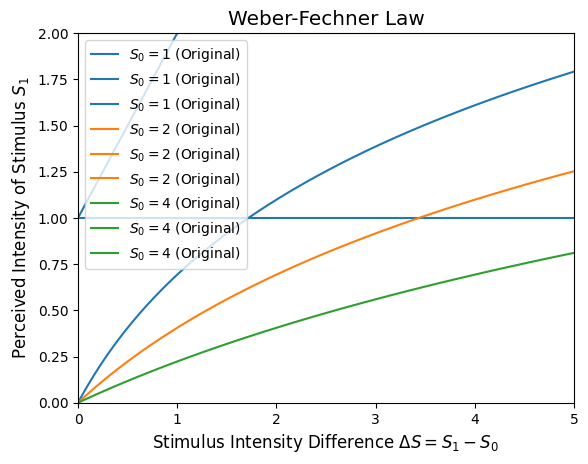

In [ ]:
s.plotter()

... against a fitted model if it exists:

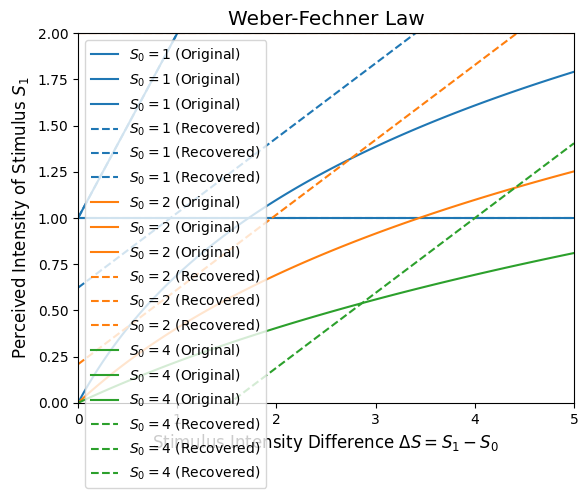

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(x, y)
s.plotter(model)

We can wrap this functions to use with the state logic of AutoRA:
First, we create the state with the variables:

In [ ]:
from autora.state import StandardState, on_state, experiment_runner_on_state, estimator_on_state
from autora.experimentalist.grid import grid_pool
from autora.experimentalist.random import random_sample
from functools import partial
import random

# We can get the variables from the runner
variables = s.variables

# With the variables, we initialize a StandardState
state = StandardState(variables)

Wrap the experimentalists in `on_state` function to use them on state:

In [ ]:
# Wrap the functions to use on state
# Experimentalists:
pool_on_state = on_state(grid_pool, output=['conditions'])
sample_on_state = on_state(random_sample, output=['conditions'])

state = pool_on_state(state)
state = sample_on_state(state, num_samples=20)
print(state.conditions)

            S1        S2
1484  0.715657  4.243939
5456  2.731818  2.832626
5539  2.782222  1.975758
6062  3.034242  3.135051
1622  0.816465  1.118889
5901  2.983838  0.060404
1936  0.967677  1.824545
6844  3.437475  2.227778
7073  3.538283  3.689495
2196  1.068485  4.848788
1710  0.866869  0.514040
3251  1.622929  2.580606
4298  2.126970  4.949596
7055  3.538283  2.782222
406   0.211616  0.312424
3787  1.874949  4.395152
4728  2.378990  1.421313
5214  2.631010  0.715657
1227  0.614848  1.370909
8482  4.243939  4.143131


Wrap the runner with the `experiment_runner_on_state` wrapper to use it on state:

In [ ]:
# Runner:
run_on_state = experiment_runner_on_state(s.run)
state = run_on_state(state)

state.experiment_data

,S1,S2,difference_detected
1484,0.715657,4.243939,1.777697
5456,2.731818,2.832626,0.039988
5539,2.782222,1.975758,-0.344299
6062,3.034242,3.135051,0.036409
1622,0.816465,1.118889,0.287000
5901,2.983838,0.060404,-3.903989
1936,0.967677,1.824545,0.618795
6844,3.437475,2.227778,-0.432813
7073,3.538283,3.689495,0.035054
2196,1.068485,4.848788,1.514635


Wrap the regressor with the `estimator_on_state` wrapper:

In [ ]:
theorist = LinearRegression()
theorist_on_state = estimator_on_state(theorist)

state = theorist_on_state(state)
# Access the last model:
model = state.models[-1]


print(f"I = "
      f"{model.coef_[0][0]:.2f}*S0 "
      f"{model.coef_[0][1]:+.2f}*S1 "
      f"{model.intercept_[0]:+.2f} ")

I = -0.62*S0 +0.57*S1 -0.09 
